# Day 3 More Introduction

Some define statistics as the field that focuses on turning information into
knowledge. The first step in that process is to summarize and describe the raw
information - the data. In this lab we explore flights, specifically a random
sample of domestic flights that departed from the three major 
New York City airport in 2013. We will generate simple graphical and numerical 
summaries of data on these flights and explore delay times. As this is a large 
data set, along the way you'll also learn the indispensable skills of data 
processing and subsetting.

## Getting started

### Load packages

In this lab we will explore the data using the `dplyr` package and visualize it 
using the `ggplot2` package for data visualization. The data can be found in the
companion package for this course, `statsr`.

Let's load the packages.

```{r load-packages, message=FALSE}
library(dplyr)
library(ggplot2)
```

In [12]:
library(dplyr)
library(ggplot2)

The [Bureau of Transportation Statistics](http://www.rita.dot.gov/bts/about/) 
(BTS) is a statistical agency that is a part of the Research and Innovative 
Technology Administration (RITA). As its name implies, BTS collects and makes 
available transportation data, such as the flights data we will be working with 
in this lab.

We begin by loading the `nycflights` data frame. Type the following in your console
to load the data:

```{r load-data}
data(nycflights)
```

In [13]:
data(nycflights)

Warning message in data(nycflights):
“data set ‘nycflights’ not found”

In [14]:
nycflights<-readRDS("nycflights.rds")

The data frame containing `r nrow(nycflights)` flights that shows up in your 
workspace is a *data matrix*, with each row representing an *observation* and each 
column representing a *variable*. R calls this data format a **data frame**, which is 
a term that will be used throughout the labs.

To view the names of the variables, type the command

```{r names}
names(nycflights)
```

In [15]:
names(nycflights)

'year' 
 'month' 
 'day' 
 'dep_time' 
 'dep_delay' 
 'arr_time' 
 'arr_delay' 
 'carrier' 
 'tailnum' 
 'flight' 
 'origin' 
 'dest' 
 'air_time' 
 'distance' 
 'hour' 
 'minute'

This returns the names of the variables in this data frame. The **codebook**
(description of the variables) is included below. This information can also be
found in the help file for the data frame which can be accessed by typing
`?nycflights` in the console.

- `year`, `month`, `day`: Date of departure
- `dep_time`, `arr_time`: Departure and arrival times, local timezone.
- `dep_delay`, `arr_delay`: Departure and arrival delays, in minutes. Negative times represent early departures/arrivals.
- `carrier`: Two letter carrier abbreviation.
    + `9E`:           Endeavor Air Inc.
    + `AA`:      American Airlines Inc.
    + `AS`:        Alaska Airlines Inc.
    + `B6`:             JetBlue Airways
    + `DL`:        Delta Air Lines Inc.
    + `EV`:    ExpressJet Airlines Inc.
    + `F9`:      Frontier Airlines Inc.
    + `FL`: AirTran Airways Corporation
    + `HA`:      Hawaiian Airlines Inc.
    + `MQ`:                   Envoy Air
    + `OO`:       SkyWest Airlines Inc.
    + `UA`:       United Air Lines Inc.
    + `US`:             US Airways Inc.
    + `VX`:              Virgin America
    + `WN`:      Southwest Airlines Co.
    + `YV`:          Mesa Airlines Inc.
- `tailnum`: Plane tail number
- `flight`: Flight number
- `origin`, `dest`: Airport codes for origin and destination. (Google can help
you with what code stands for which airport.)
- `air_time`: Amount of time spent in the air, in minutes.
- `distance`: Distance flown, in miles.
- `hour`, `minute`: Time of departure broken in to hour and minutes.

A very useful function for taking a quick peek at your data frame, and viewing
its dimensions and data types is `str`, which stands for **str**ucture.

```{r str}
str(nycflights)
```

In [16]:
str(nycflights)

Classes ‘tbl_df’ and 'data.frame':	32735 obs. of  16 variables:
 $ year     : int  2013 2013 2013 2013 2013 2013 2013 2013 2013 2013 ...
 $ month    : int  6 5 12 5 7 1 12 8 9 4 ...
 $ day      : int  30 7 8 14 21 1 9 13 26 30 ...
 $ dep_time : int  940 1657 859 1841 1102 1817 1259 1920 725 1323 ...
 $ dep_delay: num  15 -3 -1 -4 -3 -3 14 85 -10 62 ...
 $ arr_time : int  1216 2104 1238 2122 1230 2008 1617 2032 1027 1549 ...
 $ arr_delay: num  -4 10 11 -34 -8 3 22 71 -8 60 ...
 $ carrier  : chr  "VX" "DL" "DL" "DL" ...
 $ tailnum  : chr  "N626VA" "N3760C" "N712TW" "N914DL" ...
 $ flight   : int  407 329 422 2391 3652 353 1428 1407 2279 4162 ...
 $ origin   : chr  "JFK" "JFK" "JFK" "JFK" ...
 $ dest     : chr  "LAX" "SJU" "LAX" "TPA" ...
 $ air_time : num  313 216 376 135 50 138 240 48 148 110 ...
 $ distance : num  2475 1598 2475 1005 296 ...
 $ hour     : num  9 16 8 18 11 18 12 19 7 13 ...
 $ minute   : num  40 57 59 41 2 17 59 20 25 23 ...


The `nycflights` data frame is a massive trove of information. Let's think about 
some questions we might want to answer with these data:

- We might want to find out how delayed flights headed to a particular 
destination tend to be. 
- We might want to evaluate how departure delays vary over months. 
- Or we might want to determine which of the three major NYC airports has a better 
on time percentage for departing flights.

### Seven verbs

The `dplyr` package offers seven verbs (functions) for basic data 
manipulation:

- `filter()`
- `arrange()`
- `select()` 
- `distinct()`
- `mutate()`
- `summarise()`
- `sample_n()`

We will use some of these functions in this lab, and learn about others in a 
future lab.


## Analysis

### Departure delays in flights to Raleigh-Durham (RDU)

We can examine the distribution of departure delays of all flights with a 
histogram.

```{r hist-dep-delay}
ggplot(data = nycflights, aes(x = dep_delay)) +
  geom_histogram()
```

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


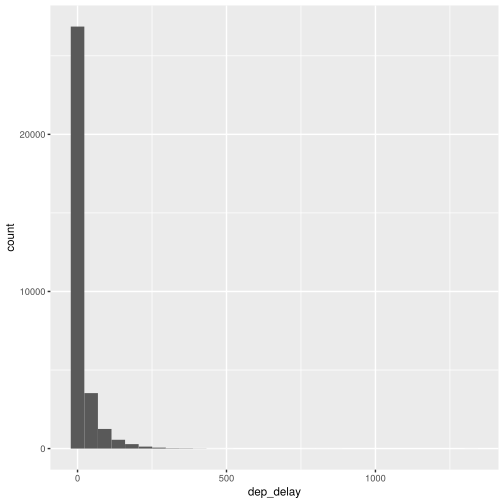

In [17]:
ggplot(data = nycflights, aes(x = dep_delay)) +
  geom_histogram()

This function says to plot the `dep_delay` variable from the `nycflights` data 
frame on the x-axis. It also defines a `geom` (short for geometric object), 
which describes the type of plot you will produce. 

Histograms are generally a very good way to see the shape of a single 
distribution, but that shape can change depending on how the data is split 
between the different bins. You can easily define the binwidth you want to use:

```{r hist-dep-delay-bins}
ggplot(data = nycflights, aes(x = dep_delay)) +
  geom_histogram(binwidth = 15)
ggplot(data = nycflights, aes(x = dep_delay)) +
  geom_histogram(binwidth = 150)
```


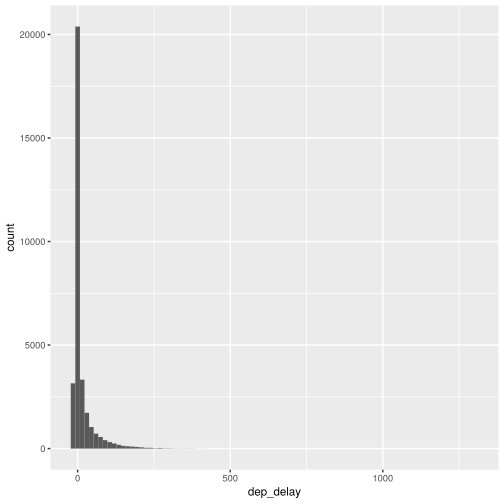

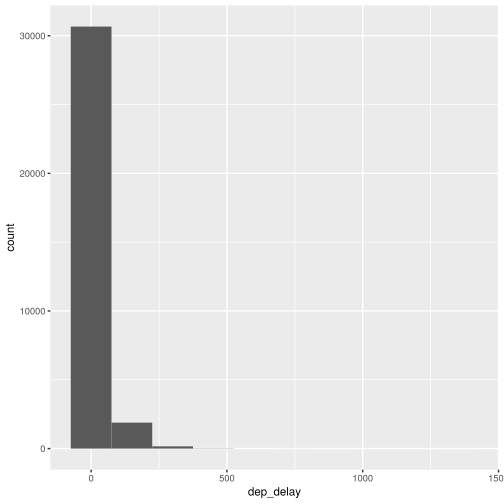

In [18]:
ggplot(data = nycflights, aes(x = dep_delay)) +
  geom_histogram(binwidth = 15)
ggplot(data = nycflights, aes(x = dep_delay)) +
  geom_histogram(binwidth = 150)

<em><span style="color:blue">Question 1:</span></em> How do these three histograms with the various binwidths compare?

If we want to focus on departure delays of flights headed to RDU only, we need to
first `filter` the data for flights headed to RDU (`dest == "RDU"`) and then make
a histogram of only departure delays of only those flights.

```{r rdu-flights-hist}
rdu_flights <- nycflights %>%
  filter(dest == "RDU")
ggplot(data = rdu_flights, aes(x = dep_delay)) +
  geom_histogram()
```


`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


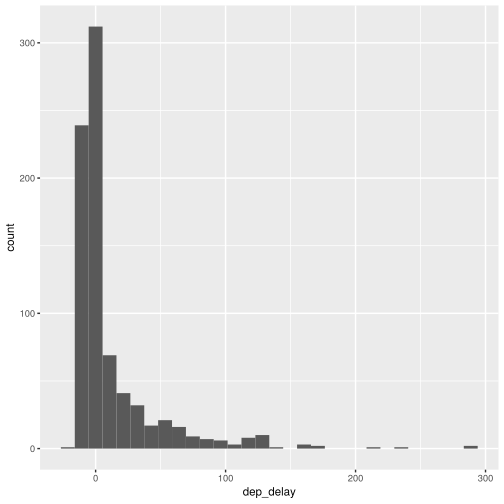

In [19]:
rdu_flights <- nycflights %>%
  filter(dest == "RDU")
ggplot(data = rdu_flights, aes(x = dep_delay)) +
  geom_histogram()

Let's decipher these three lines of code:

- Line 1: Take the `nycflights` data frame, `filter` for flights headed to RDU, and 
save the result as a new data frame called `rdu_flights`.
    + `==` means "if it's equal to".
    + `RDU` is in quotation marks since it is a character string.
- Line 2: Basically the same `ggplot` call from earlier for making a histogram, 
except that it uses the data frame for flights headed to RDU instead of all
flights.


**Logical operators:** Filtering for certain observations (e.g. flights from a 
particular airport) is often of interest in data frames where we might want to 
examine observations with certain characteristics separately from the rest of 
the data. To do so we use the `filter` function and a series of 
**logical operators**. The most commonly used logical operators for data 
analysis are as follows:

- `==` means "equal to"
- `!=` means "not equal to"
- `>` or `<` means "greater than" or "less than"
- `>=` or `<=` means "greater than or equal to" or "less than or equal to"

We can also obtain numerical summaries for these flights:

```{r rdu-flights-summ}
rdu_flights %>%
  summarise(mean_dd = mean(dep_delay), sd_dd = sd(dep_delay), n = n())


In [20]:
rdu_flights %>%
  summarise(mean_dd = mean(dep_delay), sd_dd = sd(dep_delay), n = n())

mean_dd,sd_dd,n
11.69913,35.55567,801


Note that in the `summarise` function we created a list of two elements. The 
names of these elements are user defined, like `mean_dd`, `sd_dd`, `n`, and 
you could customize these names as you like (just don't use spaces in your 
names). Calculating these summary statistics also require that you know the 
function calls. Note that `n()` reports the sample size.


**Summary statistics:** Some useful function calls for summary statistics for a 
single numerical variable are as follows:

- `mean`
- `median`
- `sd`
- `var`
- `IQR`
- `range`
- `min`
- `max`


We can also filter based on multiple criteria. Suppose we are interested in
flights headed to San Francisco (SFO) in February:

```{r}
sfo_feb_flights <- nycflights %>%
  filter(dest == "SFO", month == 2)
```


In [35]:
sfo_feb_flights <- nycflights %>%
  filter(dest == "SFO", month == 2)

Note that we can separate the conditions using commas if we want flights that
are both headed to SFO **and** in February. If we are interested in either
flights headed to SFO **or** in February we can use the `|` instead of the comma.

<em><span style="color:blue">Question 2:</span></em> Create a new data frame that includes flights headed to SFO in February, and save 
this data frame as `sfo_feb_flights`. How many flights meet these criteria? 
<ol>
<li> 68 </li> 
<li> 1345 </li> 
<li> 2286 </li> 
<li> 3563 </li>
<li> 32735 </li>
</ol>


In [36]:
str(sfo_feb_flights)

Classes ‘tbl_df’, ‘tbl’ and 'data.frame':	68 obs. of  18 variables:
 $ year        : int  2013 2013 2013 2013 2013 2013 2013 2013 2013 2013 ...
 $ month       : int  2 2 2 2 2 2 2 2 2 2 ...
 $ day         : int  18 3 15 18 24 25 7 15 13 8 ...
 $ dep_time    : int  1527 613 955 1928 1340 1415 1032 1805 1056 656 ...
 $ dep_delay   : num  57 14 -5 15 2 -10 1 20 -4 -4 ...
 $ arr_time    : int  1903 1008 1313 2239 1644 1737 1352 2122 1412 1039 ...
 $ arr_delay   : num  48 38 -28 -6 -21 -13 -10 2 -13 -6 ...
 $ carrier     : chr  "DL" "UA" "DL" "UA" ...
 $ tailnum     : chr  "N711ZX" "N502UA" "N717TW" "N24212" ...
 $ flight      : int  1322 691 1765 1214 1111 394 641 177 642 1865 ...
 $ origin      : chr  "JFK" "JFK" "JFK" "EWR" ...
 $ dest        : chr  "SFO" "SFO" "SFO" "SFO" ...
 $ air_time    : num  358 367 338 353 341 355 359 338 347 361 ...
 $ distance    : num  2586 2586 2586 2565 2565 ...
 $ hour        : num  15 6 9 19 13 14 10 18 10 6 ...
 $ minute      : num  27 13 55 28 40 15 32 5

**Write your answer here**

<em><span style="color:blue">Question 3:</span></em> Make a histogram and calculate appropriate summary statistics for **arrival** 
delays of `sfo_feb_flights`. Which of the following is false? 
<ol>
<li> The distribution is unimodal. </li> 
<li> The distribution is right skewed. </li> 
<li> No flight is delayed more than 2 hours. </li> 
<li> The distribution has several extreme values on the right side. </li>
<li> More than 50% of flights arrive on time or earlier than scheduled. </li>
</ol>


`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
 -66.00  -21.25  -11.00   -4.50    2.00  196.00 

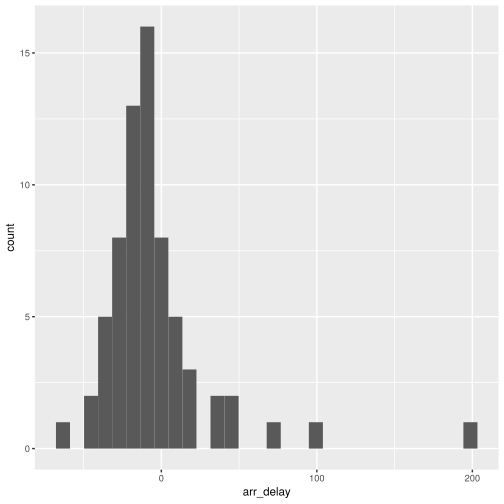

In [37]:
ggplot(data = sfo_feb_flights, aes(x = arr_delay)) +
  geom_histogram()
summary(sfo_feb_flights$arr_delay)


**Write your answer here**

Another useful functionality is being able to quickly calculate summary 
statistics for various groups in your data frame. For example, we can modify the 
above command using the `group_by` function to get the same summary stats for 
each origin airport:

```{r summary-custom-list-origin}
rdu_flights %>%
  group_by(origin) %>%
  summarise(mean_dd = mean(dep_delay), sd_dd = sd(dep_delay), n = n())
```


In [34]:
rdu_flights %>%
  group_by(origin) %>%
  summarise(mean_dd = mean(dep_delay), sd_dd = sd(dep_delay), n = n())

origin,mean_dd,sd_dd,n
EWR,13.365517,32.08492,145
JFK,15.396667,40.30535,300
LGA,7.904494,32.18620,356


Here, we first grouped the data by `origin`, and then calculated the summary 
statistics.

<em><span style="color:blue">Question 4:</span></em> Calculate the median and interquartile range for `arr_delay`s of flights in the 
`sfo_feb_flights` data frame, grouped by carrier. Which carrier has the hights 
IQR of arrival delays? 
<ol>
<li> American Airlines </li> 
<li> JetBlue Airways </li> 
<li> Virgin America </li> 
<li> Delta and United Airlines </li>
<li> Frontier Airlines </li>
</ol>


**Write answer here**

### Departure delays over months

Which month would you expect to have the highest average delay departing 
from an NYC airport?

Let's think about how we would answer this question:

- First, calculate monthly averages for departure delays. With the new language
we are learning, we need to
    + `group_by` months, then
    + `summarise` mean departure delays.
- Then, we need to `arrange` these average delays in `desc`ending order

```{r mean-dep-delay-months}
nycflights %>%
  group_by(month) %>%
  summarise(mean_dd = mean(dep_delay)) %>%
  arrange(desc(mean_dd))
```

In [22]:
nycflights %>%
  group_by(month) %>%
  summarise(mean_dd = mean(dep_delay)) %>%
  arrange(desc(mean_dd))


month,mean_dd
7,20.754559
6,20.350293
12,17.368189
4,14.554477
3,13.517602
5,13.264800
8,12.619097
2,10.687227
1,10.233333
9,6.872436


<em><span style="color:blue">Question 5:</span></em> Which month has the highest average departure delay from an NYC airport? 
<ol>
<li> January </li> 
<li> March </li> 
<li> July </li> 
<li> October </li>
<li> December </li>
</ol>

**Write answer here**

<em><span style="color:blue">Question 6:</span></em> Which month has the highest median departure delay from an NYC airport?
<ol>
<li> January </li> 
<li> March </li> 
<li> July </li> 
<li> October </li>
<li> December </li>
</ol>

In [33]:
nycflights %>%
  group_by(month) %>%
  summarise(median_dd = median(dep_delay)) %>%
  arrange(desc(median_dd))

month,median_dd
12,1
6,0
7,0
3,-1
5,-1
8,-1
1,-2
2,-2
4,-2
11,-2


<em><span style="color:blue">Question 7:</span></em>  Is the mean or the median a more reliable measure for deciding which month(s) to 
avoid flying if you really dislike delayed flights, and why? 
<ol>
<li> Mean would be more reliable as it gives us the true average. </li> 
<li> Mean would be more reliable as the distribution of delays is symmetric. </li> 
<li> Median would be more reliable as the distribution of delays is skewed. </li> 
<li> Median would be more reliable as the distribution of delays is symmetric. </li>
<li> Both give us useful information. </li>
</ol>

We can also visualize the distributions of departure delays across months using 
side-by-side box plots:

```{r delay-month-box}
ggplot(nycflights, aes(x = factor(month), y = dep_delay)) +
  geom_boxplot()
```

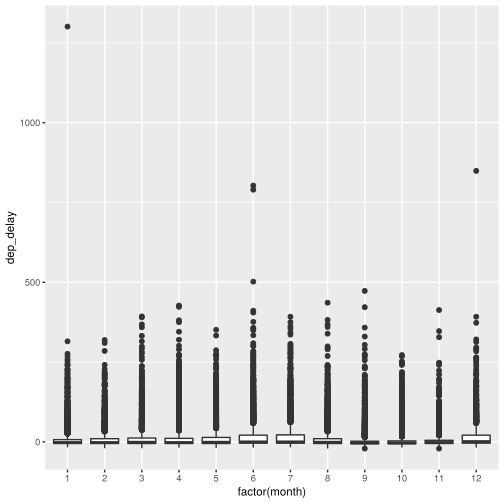

In [32]:
ggplot(nycflights, aes(x = factor(month), y = dep_delay)) +
  geom_boxplot()

There is some new syntax here: We want departure delays on the y-axis and the
months on the x-axis to produce side-by-side box plots. Side-by-side box plots
require a categorical variable on the x-axis, however in the data frame `month` is 
stored as a numerical variable (numbers 1 - 12). Therefore we can force R to treat
this variable as categorical, what R calls a **factor**, variable with 
`factor(month)`.


### On time departure rate for NYC airports

Suppose you will be flying out of NYC and want to know which of the 
three major NYC airports has the best on time departure rate of departing flights. 
Suppose also that for you a flight that is delayed for less than 5 minutes is 
basically "on time". You consider any flight delayed for 5 minutes of more to be 
"delayed".

In order to determine which airport has the best on time departure rate, 
we need to 

- first classify each flight as "on time" or "delayed",
- then group flights by origin airport,
- then calculate on time departure rates for each origin airport,
- and finally arrange the airports in descending order for on time departure
percentage.

Let's start with classifying each flight as "on time" or "delayed" by
creating a new variable with the `mutate` function.

```{r dep-type}
nycflights <- nycflights %>%
  mutate(dep_type = ifelse(dep_delay < 5, "on time", "delayed"))
```


In [25]:
nycflights <- nycflights %>%
  mutate(dep_type = ifelse(dep_delay < 5, "on time", "delayed"))

The first argument in the `mutate` function is the name of the new variable
we want to create, in this case `dep_type`. Then if `dep_delay < 5` we classify 
the flight as `"on time"` and `"delayed"` if not, i.e. if the flight is delayed 
for 5 or more minutes.

Note that we are also overwriting the `nycflights` data frame with the new 
version of this data frame that includes the new `dep_type` variable.

We can handle all the remaining steps in one code chunk:

```{r}
nycflights %>%
  group_by(origin) %>%
  summarise(ot_dep_rate = sum(dep_type == "on time") / n()) %>%
  arrange(desc(ot_dep_rate))
```


In [26]:
nycflights %>%
  group_by(origin) %>%
  summarise(ot_dep_rate = sum(dep_type == "on time") / n()) %>%
  arrange(desc(ot_dep_rate))

origin,ot_dep_rate
LGA,0.7279229
JFK,0.6935854
EWR,0.6369892


**The summarise step is telling R to count up how many records of the currently found group are on time - sum(dep_type == "on time") - and divide that result by the total number of elements in the currently found group - n() - to get a proportion, then to store the answer in a new variable called ot_dep_rate.**

<em><span style="color:blue">Question 8:</span></em> If you were selecting an airport simply based on on time departure percentage, 
which NYC airport would you choose to fly out of? 
<ol>
<li> EWR </li> 
<li> JFK </li> 
<li> LGA </li> 
</ol>


We can also visualize the distribution of on on time departure rate across 
the three airports using a segmented bar plot.

```{r}
ggplot(data = nycflights, aes(x = origin, fill = dep_type)) +
  geom_bar()
```

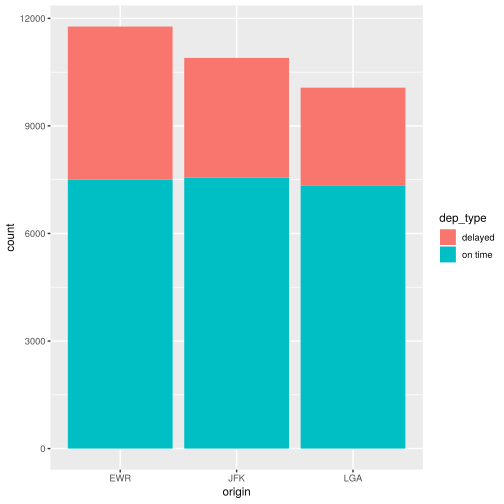

In [30]:
ggplot(data = nycflights, aes(x = origin, fill = dep_type)) +
  geom_bar()

<em><span style="color:blue">Question 9:</span></em>  Mutate the data frame so that it includes a new variable that contains the 
average speed, `avg_speed` traveled by the plane for each flight (in mph). What is 
the tail number of the plane with the fastest `avg_speed`? **Hint:** Average speed 
can be calculated as distance divided by number of hours of travel, and note that 
`air_time` is given in minutes. If you just want to show the `avg_speed` and 
`tailnum` and none of the other variables, use the select function at the end of your 
pipe to select just these two variables with `select(avg_speed, tailnum)`. You can 
Google this tail number to find out more about the aircraft. 
<ol>
<li> N666DN </li> 
<li> N755US </li> 
<li> N779JB </li> 
<li> N947UW </li> 
<li> N959UW </li> 
</ol>


In [31]:
nycflights <- nycflights %>%
  mutate(avg_speed_dd = distance/(air_time/60.0))
nycflights %>%
  group_by(tailnum) %>%
  select(avg_speed_dd) %>%
  arrange(desc(avg_speed_dd))

Adding missing grouping variables: `tailnum`


tailnum,avg_speed_dd
N666DN,703.3846
N779JB,557.4419
N571JB,554.2197
N568JB,547.8857
N5EHAA,547.8857
N656JB,547.8857
N789JB,544.7727
N516JB,538.6517
N648JB,535.6425
N510JB,535.6425
